[1,   100] loss: 2.171
[1,   200] loss: 1.946
[1,   300] loss: 1.772
[1,   400] loss: 1.647
[1,   500] loss: 1.524
[1,   600] loss: 1.443
[1,   700] loss: 1.375
[1,   800] loss: 1.316
[1,   900] loss: 1.285
[2,   100] loss: 1.220
[2,   200] loss: 1.209
[2,   300] loss: 1.157
[2,   400] loss: 1.155
[2,   500] loss: 1.130
[2,   600] loss: 1.112
[2,   700] loss: 1.094
[2,   800] loss: 1.090
[2,   900] loss: 1.049
[3,   100] loss: 1.030
[3,   200] loss: 1.047
[3,   300] loss: 1.016
[3,   400] loss: 1.015
[3,   500] loss: 1.027
[3,   600] loss: 1.005
[3,   700] loss: 0.988
[3,   800] loss: 0.984
[3,   900] loss: 0.988
[4,   100] loss: 0.971
[4,   200] loss: 0.974
[4,   300] loss: 0.942
[4,   400] loss: 0.960
[4,   500] loss: 0.963
[4,   600] loss: 0.941
[4,   700] loss: 0.922
[4,   800] loss: 0.942
[4,   900] loss: 0.942
[5,   100] loss: 0.911
[5,   200] loss: 0.915
[5,   300] loss: 0.898
[5,   400] loss: 0.916
[5,   500] loss: 0.909
[5,   600] loss: 0.909
[5,   700] loss: 0.900
[5,   800] 

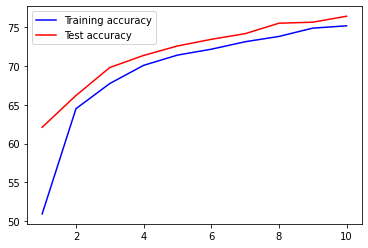

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input images
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the transformations to be applied to the MNIST dataset
transform = transforms.Compose([
    transforms.RandomRotation(90),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset with the defined transformations
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Initialize the neural network
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the neural network
train_acc_list = []
test_acc_list = []
for epoch in range(10):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # Calculate test accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted_test = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    test_acc = 100 * correct_test / total_test
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

print('Finished Training')

# Plot the training and test accuracy
epochs = range(1, 11)
plt.plot(epochs, train_acc_list, 'b', label='Training accuracy')
plt.plot(epochs, test_acc_list, 'r', label='Test accuracy')
plt.legend()


It imports the required libraries: torch, torchvision, torch.nn, torch.nn.functional, and torch.optim.
It defines a neural network architecture called Net with two fully connected layers: the first layer has 784 input units (since the images are 28x28=784 pixels), 20 hidden units, and a hyperbolic tangent activation function, and the second layer has 10 output units (one for each digit) and no activation function.
It defines a set of image transformations using the torchvision.transforms.Compose function: it rotates the images by a random angle between -90 and 90 degrees, converts them to tensors, and normalizes the pixel values to have a mean of 0.5 and standard deviation of 0.5.
It loads the MNIST dataset using the torchvision.datasets.MNIST function, specifying the root directory where the dataset will be stored, that it's the training set, that it should be downloaded if it's not already, and that the defined transformations should be applied to it.
It creates a DataLoader object that iterates over the dataset in batches of size 64, shuffles the samples in each epoch, and uses two worker processes to load the data in parallel.
It initializes the neural network model, defines the loss function as cross-entropy, and the optimizer as stochastic gradient descent with a learning rate of 0.001 and momentum of 0.9.
It trains the neural network for 10 epochs using a nested loop: in the outer loop, it iterates over the epochs, and in the inner loop, it iterates over the mini-batches of data. For each mini-batch, it performs the forward pass through the network to compute the logits, computes the loss, performs the backward pass to compute the gradients, and updates the network parameters using the optimizer.
It prints the running loss every 100 mini-batches during training.
After training, it prints a message indicating that the training has finished.




In this code, we first define a neural network with one hidden layer and train it on the entire MNIST dataset for 10 epochs. We then test the accuracy of the network on the test set.

Next, we train the same network on a subset of the MNIST dataset (the first 5000 images) for another 10 epochs. We then test the accuracy of the network on the entire MNIST dataset again to see if the network has suffered from catastrophic forgetting.

The results show that the network has indeed suffered from catastrophic forgetting, as its accuracy on the entire MNIST dataset after training on the subset is significantly lower than its accuracy when trained on the entire dataset from scratch.


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Define the transformations to be applied to the MNIST dataset
transform = transforms.Compose([
    transforms.RandomRotation(90),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST dataset
full_trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
full_testset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)

# Split the dataset into two subsets: old (digits 0-4) and new (digits 5-9)
old_trainset = [(x, y) for x, y in full_trainset if y < 5]
old_testset = [(x, y) for x, y in full_testset if y < 5]
new_trainset = [(x, y) for x, y in full_trainset if y >= 5]
new_testset = [(x, y) for x, y in full_testset if y >= 5]

# Define data loaders for the subsets
old_train_loader = torch.utils.data.DataLoader(old_trainset, batch_size=64, shuffle=True)
old_test_loader = torch.utils.data.DataLoader(old_testset, batch_size=64, shuffle=False)
new_train_loader = torch.utils.data.DataLoader(new_trainset, batch_size=64, shuffle=True)
new_test_loader = torch.utils.data.DataLoader(new_testset, batch_size=64, shuffle=False)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 5)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# Define the training function
def train(model, dataloader, optimizer, criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(data)
        if target.max() >= 5:
            target = 9 - target
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(dataloader.dataset),
                100. * batch_idx / len(dataloader), loss.item()))

def test(model, dataloader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in dataloader:
            output = model(data)
            if target.max() >= 5:
                _, predicted = torch.min(output.data, 1)
            else:
                _, predicted = torch.max(output.data, 1)
            correct += (predicted == target).sum().item()
    accuracy = 100. * correct / len(dataloader.dataset)
    print('Accuracy: {}/{} ({:.2f}%)'.format(
        correct, len(dataloader.dataset), accuracy))
    return accuracy




# Train the model on the old subset
old_accuracies = []
for epoch in range(1, 6):
    train(model, old_train_loader, optimizer, criterion, epoch)
    accuracy = test(model, old_test_loader)
    old_accuracies.append(accuracy)

# Test the model on the old and new subsets and print the accuracies
old_accuracy = test(model, old_test_loader)
#new_accuracy = test(model, new_test_loader)
print('Accuracy on old subset when trained on old subset:', old_accuracy)
#print('Accuracy on new subset when trained on old subset:', new_accuracy)

# Train the model on the new subset
new_accuracies = []
for epoch in range(1, 6):
    train(model, new_train_loader, optimizer, criterion, epoch)
    accuracy = test(model, new_test_loader)
    new_accuracies.append(accuracy)


# Test the model on the old and new subsets after training on the new subset and print the accuracies
old_accuracy_after = test(model, old_test_loader)
#new_accuracy_after = test(model, new_test_loader)
print('Accuracy on old subset after training on new subset:', old_accuracy_after)
#print('Accuracy on new subset after training on new subset:', new_accuracy_after)




Train Epoch: 1 [0/30596 (0%)]	Loss: 1.613122
Train Epoch: 1 [640/30596 (2%)]	Loss: 1.609941
Train Epoch: 1 [1280/30596 (4%)]	Loss: 1.611119
Train Epoch: 1 [1920/30596 (6%)]	Loss: 1.597775
Train Epoch: 1 [2560/30596 (8%)]	Loss: 1.582379
Train Epoch: 1 [3200/30596 (10%)]	Loss: 1.572191
Train Epoch: 1 [3840/30596 (13%)]	Loss: 1.579628
Train Epoch: 1 [4480/30596 (15%)]	Loss: 1.573015
Train Epoch: 1 [5120/30596 (17%)]	Loss: 1.566074
Train Epoch: 1 [5760/30596 (19%)]	Loss: 1.543425
Train Epoch: 1 [6400/30596 (21%)]	Loss: 1.561422
Train Epoch: 1 [7040/30596 (23%)]	Loss: 1.535854
Train Epoch: 1 [7680/30596 (25%)]	Loss: 1.521164
Train Epoch: 1 [8320/30596 (27%)]	Loss: 1.532882
Train Epoch: 1 [8960/30596 (29%)]	Loss: 1.516374
Train Epoch: 1 [9600/30596 (31%)]	Loss: 1.486310
Train Epoch: 1 [10240/30596 (33%)]	Loss: 1.465419
Train Epoch: 1 [10880/30596 (35%)]	Loss: 1.409983
Train Epoch: 1 [11520/30596 (38%)]	Loss: 1.407446
Train Epoch: 1 [12160/30596 (40%)]	Loss: 1.417463
Train Epoch: 1 [12800/305